In [1]:
from sklearn.datasets import make_blobs,make_moons,make_circles
from matplotlib import pyplot
from pandas import DataFrame
import seaborn as sns 
import pandas as pd
sns.set()

In [2]:
"""from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
model=KMeans(n_clusters=3)
model.fit(x)
yhat = model.predict(x)
clusters = unique(yhat)
for cluster in clusters:

    row_ix = where(yhat == cluster)

    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])

pyplot.show()"""

'from sklearn.cluster import KMeans\nfrom numpy import unique\nfrom numpy import where\nmodel=KMeans(n_clusters=3)\nmodel.fit(x)\nyhat = model.predict(x)\nclusters = unique(yhat)\nfor cluster in clusters:\n\n    row_ix = where(yhat == cluster)\n\n    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])\n\npyplot.show()'

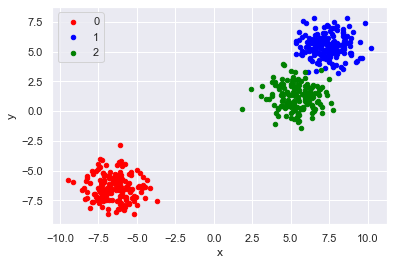

In [3]:
#blobs Dataset for multiclassification (for linear Dataset)
x,y=make_blobs(n_samples=500,centers=3,n_features=3)
df = DataFrame(dict(x=x[:,0], y=x[:,1],z=x[:,2], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

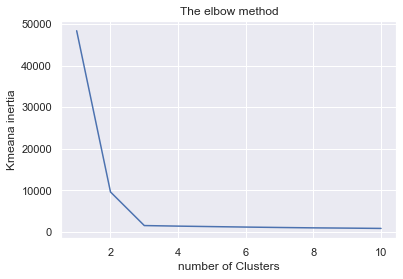

In [4]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pyplot.plot(range(1,11),wcss) 
pyplot.title("The elbow method")
pyplot.xlabel("number of Clusters")
pyplot.ylabel("Kmeana inertia")
pyplot.show()
# we can predict the number of clusters to be three

In [5]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_means=kmeans.fit_predict(x)
y_means=pd.DataFrame(y_means)
y_means=y_means.rename(columns={0:'Clusters'})
y_means

,Clusters
0,2
1,0
2,1
3,0
4,0
...,...
495,0
496,1
497,2
498,1


In [6]:
x=pd.DataFrame(x)
x=x.rename(columns={0:'Feature1',1:'Feature2',2:'Feature3'})
x

,Feature1,Feature2,Feature3
0,4.763377,2.624294,0.787675
1,7.758299,5.455671,8.657640
2,-7.640536,-5.047107,-5.464540
3,7.904394,5.023814,9.787113
4,6.377366,5.757178,9.721910
...,...,...,...
495,8.808395,7.153911,8.547652
496,-7.128392,-5.485503,-4.545337
497,5.179059,-0.001001,-1.600438
498,-6.968011,-6.477883,-2.659861


In [7]:
Final_Report=pd.concat([x,y_means],axis=1)
Final_Report

,Feature1,Feature2,Feature3,Clusters
0,4.763377,2.624294,0.787675,2
1,7.758299,5.455671,8.657640,0
2,-7.640536,-5.047107,-5.464540,1
3,7.904394,5.023814,9.787113,0
4,6.377366,5.757178,9.721910,0
...,...,...,...,...
495,8.808395,7.153911,8.547652,0
496,-7.128392,-5.485503,-4.545337,1
497,5.179059,-0.001001,-1.600438,2
498,-6.968011,-6.477883,-2.659861,1


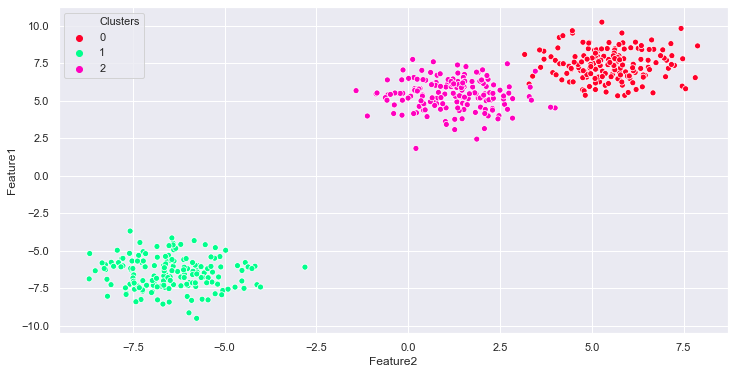

In [8]:
pyplot.figure(figsize=(12,6))
sns.scatterplot(y='Feature1',x='Feature2',data=Final_Report,hue='Clusters',palette='gist_rainbow')
pyplot.legend()
pyplot.show()